8.3 Zadanie: przestępczość

I. Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do obiektu DataFrame.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('fatal-police-shootings-data.csv')

df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


II. Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('fatal-police-shootings-data.csv')

summary_table = df.groupby(['race', 'signs_of_mental_illness']).size().unstack(fill_value=0)
summary_table

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


III. Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. 
Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.

In [27]:
import pandas as pd

df = pd.read_csv('fatal-police-shootings-data.csv')

summary_table = df.groupby(['race', 'signs_of_mental_illness']).size().unstack(fill_value=0)

summary_table['percentage_with_mental_illness'] = summary_table.apply(
    lambda row: (row[True] / (row[True] + row[False])) * 100, axis=1
)

print("Summary Table:")
print(summary_table)

Summary Table:
signs_of_mental_illness  False  True  percentage_with_mental_illness
race                                                                
A                           69    24                       25.806452
B                         1114   184                       14.175655
H                          745   157                       17.405765
N                           64    14                       17.948718
O                           37    11                       22.916667
W                         1763   713                       28.796446


Znalezienie rasy z największym odsetkiem znamion choroby psychicznej.

In [21]:
max_percentage_race = summary_table['percentage_with_mental_illness'].idxmax()

print("Summary Table:")
print(summary_table)
print("\nRasa z najwyższym odsetkiem objawów choroby psychicznej:", max_percentage_race)

Summary Table:
signs_of_mental_illness  False  True  percentage_with_mental_illness
race                                                                
A                           69    24                       25.806452
B                         1114   184                       14.175655
H                          745   157                       17.405765
N                           64    14                       17.948718
O                           37    11                       22.916667
W                         1763   713                       28.796446

Rasa z najwyższym odsetkiem objawów choroby psychicznej: W


IV. Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. 
Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('fatal-police-shootings-data.csv')

df['date'] = pd.to_datetime(df['date'])

df['day_of_week'] = df['date'].dt.day_name()

interventions_by_day = df['day_of_week'].value_counts().sort_index()
interventions_by_day

day_of_week
Friday       761
Monday       726
Saturday     721
Sunday       753
Thursday     810
Tuesday      816
Wednesday    829
Name: count, dtype: int64

Tworzenie wykresu interwencji według dnia tygodnia w kolejności od poniedziałku do niedzieli.

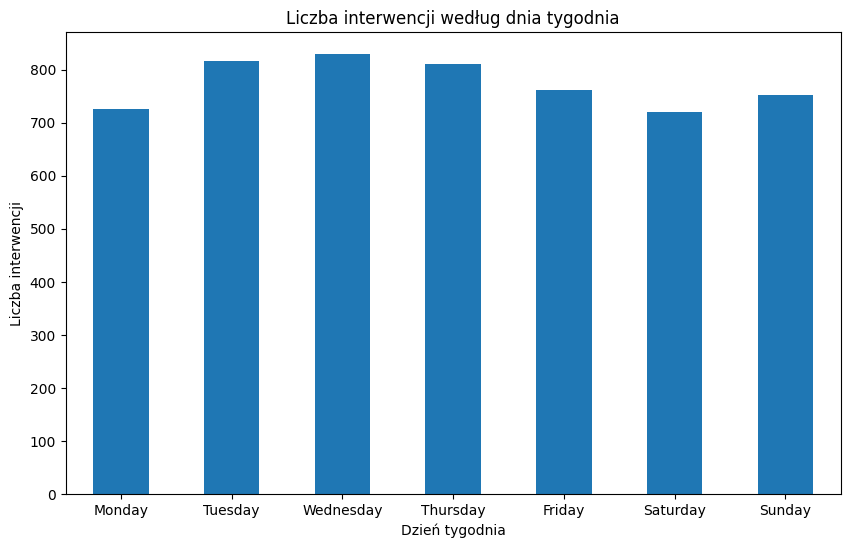

In [25]:
plt.figure(figsize=(10, 6))
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
interventions_by_day[days_order].plot(kind='bar')
plt.title('Liczba interwencji według dnia tygodnia')
plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba interwencji')
plt.xticks(rotation=0)  # Zmiana kąta obrotu etykiet
plt.show()


V. Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. 
Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.

In [14]:
df = pd.read_csv('fatal-police-shootings-data.csv')
abv_states_all = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=0)
col_name_state = abv_states_all[0].columns[0]
col_name_abv = abv_states_all[0].columns[5]
col_name_abv

pop_states_all = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)
col_name = pop_states_all[0].columns[3]
pop_states_all[0].rename(columns={col_name: 'Population'},inplace=True)
pop_states = pop_states_all[0][['State', 'Population']].sort_values(by='State') 
#pop_states_all[0].iloc[:,3]  - działamy na indeksie

df_by_state = df.groupby('state')['id'].count()
df_by_state.rename_axis("Abbreviation" ,inplace=True)

abv_states_all[0].rename(columns={col_name_state: 'State', col_name_abv: 'Abbreviation'},inplace=True) 
abv_states = abv_states_all[0][['State', 'Abbreviation']].sort_values(by='State')
df_pop_partial = pd.merge(pop_states, abv_states,how='inner',on='State' ) 
# Połączenie skrótów i liczebności populacji z ilością incydentów
df_pop = pd.merge(df_pop_partial, df_by_state ,how='inner',on='Abbreviation' )
# Dodanie kolumny: ilość incydentów na 1000 mieszkańców
df_pop['Per 1000'] = (df_pop.id / df_pop.Population ) *100
df_pop

,State,Population,Abbreviation,id,Per 1000
0,Alabama,5024279,AL,104,0.002070
1,Alaska,733391,AK,39,0.005318
2,Arizona,7151502,AZ,254,0.003552
3,Arkansas,3011524,AR,83,0.002756
4,California,39538223,CA,799,0.002021
5,Colorado,5773714,CO,195,0.003377
6,Connecticut,3605944,CT,21,0.000582
7,Delaware,989948,DE,13,0.001313
8,District of Columbia,689545,DC,13,0.001885
9,Florida,21538187,FL,350,0.001625
